# Logistic regression

In [1]:
from Functions.Common_functions import *
import pandas as pd

### Load data

In [2]:
dataset_df = formate_dataset()
dataset_df.head()

Relative Compactness  Wall area Roof area Overall height Glazing area  \
0              2.06355  -0.269786  -1.42786              1     -1.64028   
1               2.0694  -0.422547  -1.47112              1     -1.83179   
2              2.03073  -0.340612  -1.55169              1     -1.76649   
3              2.01447  -0.581134  -1.40454              1     -1.76117   
4              1.30869 -0.0477237  -1.28699              1     -1.81079   

  GAD : 0 GAD : 1 GAD : 2 GAD : 3 GAD : 4 GAD : 5 East North South West  \
0       1       0       0       0       0       0    0     1     0    0   
1       1       0       0       0       0       0    1     0     0    0   
2       1       0       0       0       0       0    0     0     1    0   
3       1       0       0       0       0       0    0     0     0    1   
4       1       0       0       0       0       0    0     1     0    0   

    Energy Energy efficiency  
0  34.2639                 B  
1  34.5898                 B  
2   38.778                 C  
3  37.9478                 C  
4  47.6759                 D

### Create test set

In [3]:
from sklearn.model_selection import train_test_split, cross_val_predict
X_train, X_test, y_train_r, y_test_r = train_test_split(dataset_df[dataset_df.columns[0:15]], dataset_df['Energy'], test_size=0.20, random_state=42)
_, _, y_train_b, y_test_b = train_test_split(dataset_df[dataset_df.columns[0:15]], dataset_df['Energy efficiency'], test_size=0.20, random_state=42) 

In [4]:
X_train.head()

Relative Compactness  Wall area Roof area Overall height Glazing area  \
60              0.531311 -0.0780456 -0.689514              1    -0.991289   
618              -1.1574   0.534939   1.00118             -1      1.23737   
346              0.84627  -0.700866 -0.666789              1     0.082403   
294              1.23387   0.113668  -1.20972              1     0.118502   
231             -1.02421  0.0316101   1.05643             -1     -1.02533   

    GAD : 0 GAD : 1 GAD : 2 GAD : 3 GAD : 4 GAD : 5 East North South West  
60        0       1       0       0       0       0    0     1     0    0  
618       0       0       1       0       0       0    0     0     1    0  
346       0       0       1       0       0       0    0     0     1    0  
294       0       1       0       0       0       0    0     0     1    0  
231       0       0       0       0       1       0    0     0     0    1

## Logistic regression algorithm without penalization

Text(0.5, 1.0, 'Nombre de labels dans le train set')

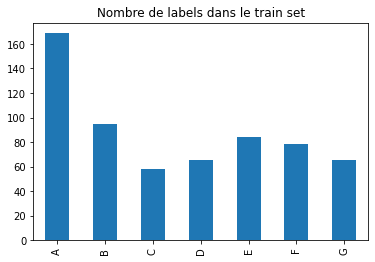

In [5]:
import matplotlib.pyplot as plt
y_train_b.value_counts().sort_index().plot.bar()
plt.title("Nombre de labels dans le train set")

It is clear that the dataset is imbalanced so we are going to use the balanced class weight in our logistic regression.

In [6]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_b),
                                                 y_train_b)
class_weights

C:\Users\User\Anaconda3\envs\Python\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=['A' 'B' 'C' 'D' 'E' 'F' 'G'], y=60     D
618    C
346    E
294    E
231    A
      ..
71     F
106    D
270    A
435    E
102    E
Name: Energy efficiency, Length: 614, dtype: object as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([0.51901944, 0.92330827, 1.51231527, 1.34945055, 1.04421769,
       1.12454212, 1.34945055])

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression(multi_class='multinomial', penalty='none', max_iter=10e10)        
grid = GridSearchCV(estimator=lr_clf, 
                    param_grid={'class_weight':['balanced', None]},
                   scoring='f1_macro')

grid.fit(X_train, y_train_b)


GridSearchCV(estimator=LogisticRegression(max_iter=100000000000.0,
                                          multi_class='multinomial',
                                          penalty='none'),
             param_grid={'class_weight': ['balanced', None]},
             scoring='f1_macro')

In [8]:
grid.best_params_

{'class_weight': None}

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np

clf = grid.best_estimator_
print('Affichage de la validation croisée pour 3 lots :')
print(cross_val_score(clf, X_train, y_train_b, cv=3))
print('Moyenne = %.2f' 
        % np.average(cross_val_score(clf, X_train, y_train_b, cv=3)))

Affichage de la validation croisée pour 3 lots :
[0.48292683 0.47804878 0.5245098 ]
Moyenne = 0.50


In [10]:
grid.score(X_train, y_train_b)

0.5360222760935296

## Test

In [11]:
print('Coefficient de determination: %.2f'
      % grid.best_estimator_.score(X_test, y_test_b))

Coefficient de determination: 0.55


In [12]:
from sklearn.metrics import classification_report

y_test_pred = grid.best_estimator_.predict(X_test)
# Print the precision and recall, among other metrics
print(classification_report(y_test_b, y_test_pred, digits=3))

              precision    recall  f1-score   support

           A      0.761     0.897     0.824        39
           B      0.316     0.429     0.364        14
           C      0.800     0.364     0.500        22
           D      0.353     0.429     0.387        14
           E      0.462     0.480     0.471        25
           F      0.476     0.417     0.444        24
           G      0.533     0.500     0.516        16

    accuracy                          0.552       154
   macro avg      0.529     0.502     0.501       154
weighted avg      0.572     0.552     0.548       154



Overfitting is very slight and we will not be able to very improve the model with a penality.

### Errors analyser

<Figure size 360x360 with 0 Axes>

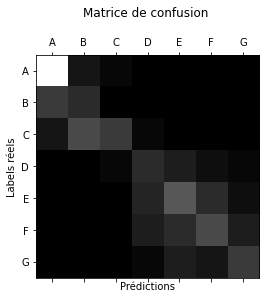

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from Functions.Classification_Functions import *

conf_mx = compute_conf_matrix(estimator=grid.best_estimator_, X=X_test, y=y_test_b)
display_conf_matrix(conf_mx)

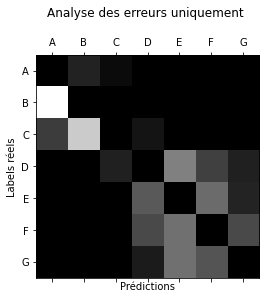

In [14]:
plot_error_analysis(conf_mx)

The model is confusing particularly the B labels with the A.

## Logistic regression with penalization


### l1 penalization

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

params = {'C': np.linspace(0, 0.5, 100), 'penalty': ['l1'], 'solver': ['saga', 'liblinear'], 'class_weight': ['balanced', None]}

search_l1 = GridSearchCV(estimator=LogisticRegression(solver='saga', max_iter=10e7, class_weight='balanced', n_jobs=-1),
             param_grid=params,
             scoring='f1_macro',
             cv=3)

search_l1.fit(X_train, y_train_b)
search_l1.best_params_

{'C': 0.2474747474747475,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'saga'}

In [16]:
scores_l1 = cross_val_score(search_l1.best_estimator_, X_train, y_train_b, scoring='f1_macro', cv=3)
scores_l1.mean()


0.5153709981683303

In [17]:
coef_variable = np.sum(search_l1.best_estimator_.coef_, axis=0)

print("L1 penalization retains " + str(sum(coef_variable != 0)) + 
      " variables and removes " +  str(sum(coef_variable == 0)) + " variables")

L1 penalization retains 11 variables and removes 4 variables


Text(0.5, 1.0, 'Coefficients du modèle lasso \n')

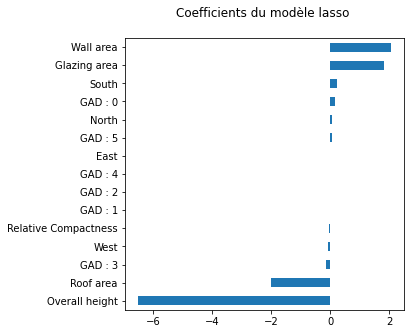

In [18]:
plt.figure(figsize=(5, 5))
imp_coef = pd.Series(data= coef_variable, index=X_train.columns).sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso \n")

### ElasticNet penalization

In [19]:
warnings.filterwarnings('ignore')

search_enet = GridSearchCV(estimator=LogisticRegression(solver='saga', max_iter=10e7, class_weight='balanced'),
             param_grid={'C': np.linspace(0, 0.2, 5), 'penalty': ['elasticnet'], 
                         'l1_ratio' : [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='f1_macro',
             cv=3)

search_enet.fit(X_train, y_train_b)
print(search_enet.best_params_)

score_enet = cross_val_score(search_enet.best_estimator_, X_train, y_train_b, scoring='f1_macro', cv=3)
score_enet.mean()


{'C': 0.2, 'l1_ratio': 0.8, 'penalty': 'elasticnet'}


0.508416408543598

In [20]:
coef_variable_enet = np.sum(search_enet.best_estimator_.coef_, axis=0)

print("Enet penalization retains " + str(sum(coef_variable != 0)) + 
      " variables and removes " +  str(sum(coef_variable == 0)) + " variables")

Enet penalization retains 11 variables and removes 4 variables


Text(0.5, 1.0, 'Coefficients du modèle lasso \n')

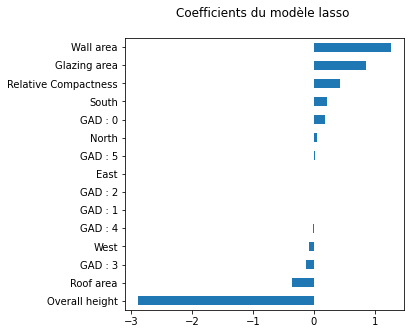

In [21]:
plt.figure(figsize=(5, 5))
imp_coef = pd.Series(data= coef_variable_enet, index=X_train.columns).sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso \n")

### L2 penalization

In [22]:
search_l2 = GridSearchCV(estimator=LogisticRegression(solver='saga', max_iter=10000),
             param_grid={'C': [0.03, 0.1, 0.3, 0.7, 0.8, 0.9, 0.95, 0.98], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             cv=3)

search_l2.fit(X_train, y_train_b)
print(search_l2.best_params_)

score_l2 = cross_val_score(search_l2.best_estimator_, X_train, y_train_b, scoring='f1_macro', cv=3)
score_l2.mean()

{'C': 0.9, 'penalty': 'l2', 'solver': 'newton-cg'}


0.46838484941395553

We can conclude regarding f1_scores with different penalization that the l1 penalization is the most performant in this use case. We are going to test this model.

## Test

In [23]:
search_l1.best_estimator_.score(X_test, y_test_b)

0.577922077922078

In [24]:
from sklearn.metrics import classification_report

y_test_pred = search_l1.best_estimator_.predict(X_test)
# Print the precision and recall, among other metrics
print(classification_report(y_test_b, y_test_pred, digits=3))

              precision    recall  f1-score   support

           A      0.825     0.846     0.835        39
           B      0.500     0.571     0.533        14
           C      0.688     0.500     0.579        22
           D      0.276     0.571     0.372        14
           E      0.500     0.320     0.390        25
           F      0.588     0.417     0.488        24
           G      0.550     0.688     0.611        16

    accuracy                          0.578       154
   macro avg      0.561     0.559     0.544       154
weighted avg      0.608     0.578     0.579       154



### Analyse des erreurs

<Figure size 360x360 with 0 Axes>

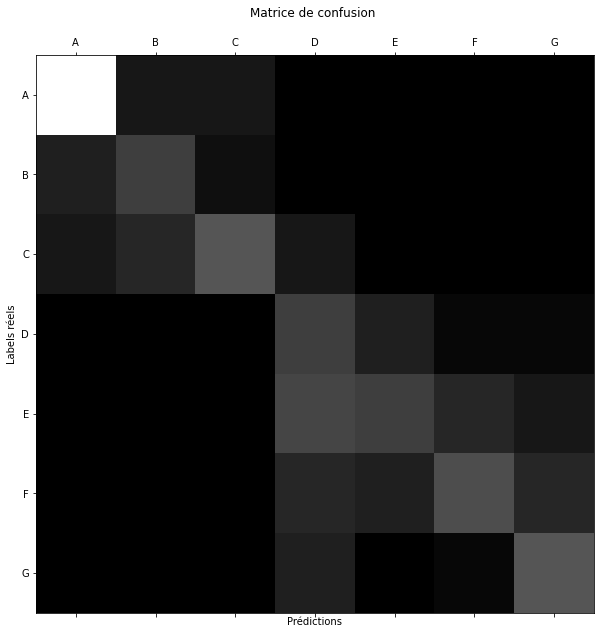

[[33  3  3  0  0  0  0]
 [ 4  8  2  0  0  0  0]
 [ 3  5 11  3  0  0  0]
 [ 0  0  0  8  4  1  1]
 [ 0  0  0  9  8  5  3]
 [ 0  0  0  5  4 10  5]
 [ 0  0  0  4  0  1 11]]


In [25]:
from Functions import Classification_Functions

conf_mx = compute_conf_matrix(estimator=search_l1.best_estimator_, X=X_test, y=y_test_b)
display_conf_matrix(conf_mx)
display_conf_matrix(conf_mx, color=False)

This model is more performant to detect A class than the other classes.

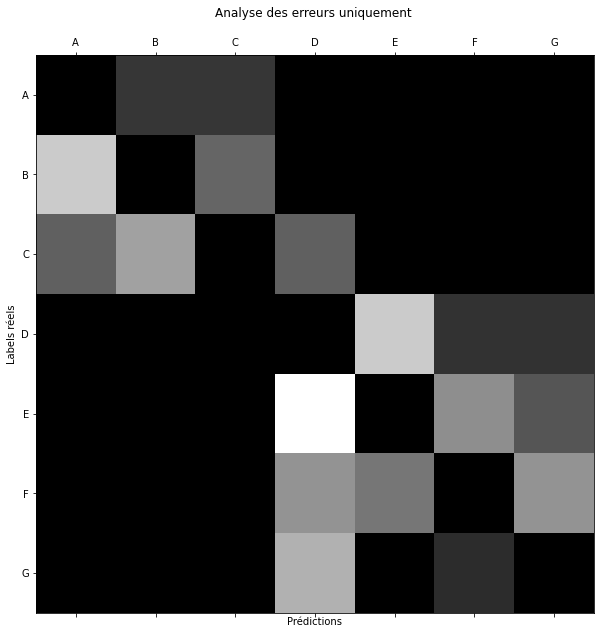

In [26]:
plot_error_analysis(conf_mx)

As we can see, this model has difficulties to detects clearly E,F,G classes.

## Logistic regression with duplication

A naive strategy is to generate new samples by randomly sampling with replacement the current available samples. We are going to try this method using an augmented data set to train a new Logsitic Regression classifier.

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled_b = ros.fit_resample(X= X_train, y=y_train_b)

<AxesSubplot:>

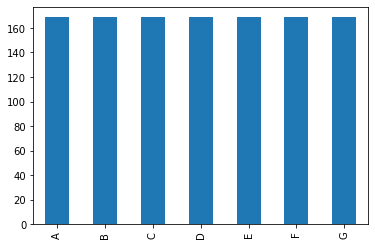

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
y_resampled_b.value_counts().sort_index().plot.bar()

### Naive oversampling

In [29]:
from sklearn.model_selection import train_test_split, cross_val_predict
X_res_train, _, y_res_train_b, _ = train_test_split(X_resampled, y_resampled_b, 
                                             test_size=0.20, random_state=42)

In [30]:
import warnings
warnings.filterwarnings('ignore')

search_enet = GridSearchCV(estimator=LogisticRegression(solver='saga', max_iter=1000000),
             param_grid={'C': np.linspace(0, 0.10, 50), 'penalty': ['elasticnet'], 
                         'l1_ratio' : [0.1, 0.3, 0.4, 0.5, 0.6, 0.7]},
             scoring = 'f1_score',
             cv=3)

search_l1.fit(X_res_train, y_res_train_b)
print(search_l1.best_params_)

score_l1 = cross_val_score(search_l1.best_estimator_, X_res_train, y_res_train_b, cv=5)
score_l1.mean()


{'C': 0.393939393939394, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}


0.5317070453912558

In [31]:
search_l1.best_estimator_.score(X_test, y_test_b)


0.5064935064935064

In [32]:
from sklearn.metrics import classification_report

y_test_pred = search_l1.best_estimator_.predict(X_test)
# Print the precision and recall, among other metrics
print(classification_report(y_test_b, y_test_pred, digits=3))

              precision    recall  f1-score   support

           A      0.800     0.821     0.810        39
           B      0.263     0.357     0.303        14
           C      0.571     0.364     0.444        22
           D      0.267     0.571     0.364        14
           E      0.429     0.240     0.308        25
           F      0.500     0.417     0.455        24
           G      0.529     0.562     0.545        16

    accuracy                          0.506       154
   macro avg      0.480     0.476     0.461       154
weighted avg      0.535     0.506     0.507       154



This datagmentation didn't work well and we haven't improved the accuracy and the f1_score of the first l1 penalization classifier.  

Therefore, we are going to implement another over-sampling technic. Indeed, we are going to implement **SMOTENC** oversampling (Synthetic Minority Over-sampling Technique for Nominal and Continuous) which is useful for dataset containing continuous and categorical features. 

SMOTE creates samples based on the K-means algorithm. It makes any distinction between easy and hard samples to be classified using the nearest neighbors rule.

### SMOTE oversampling

In [33]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

model = Pipeline([
        ('sampling', SMOTE(random_state=12)),
        ('logistic', LogisticRegression())
    ])

grid = GridSearchCV(model, estimator=LogisticRegression(solver='saga', max_iter=10e100),
             param_grid={'logistic__C': np.linspace(0, 0.10, 50), 
                         'logistic__penalty': ['l1'], 
                         'logistic__solver': ['saga', 'liblinear'],
                         'logistic__class_weight': ['balanced', None]},
             cv=3)

grid.fit(X_train, y_train_b)
print(grid.best_params_)
grid.best_estimator_.score(X_test, y_test_b)

{'logistic__C': 0.1, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


0.564935064935065

In [34]:
y_test_pred = grid.best_estimator_.predict(X_test)
# Print the precision and recall, among other metrics
print(classification_report(y_test_b, y_test_pred, digits=3))

              precision    recall  f1-score   support

           A      0.825     0.846     0.835        39
           B      0.438     0.500     0.467        14
           C      0.625     0.455     0.526        22
           D      0.276     0.571     0.372        14
           E      0.471     0.320     0.381        25
           F      0.588     0.417     0.488        24
           G      0.579     0.688     0.629        16

    accuracy                          0.565       154
   macro avg      0.543     0.542     0.528       154
weighted avg      0.591     0.565     0.566       154



Due to the synthetic over sampling, the results are better than the naive over sampling technic. 

The SMOTENC oversampling improve slightly the initial model with the l1 penalization. We are going to analyze the error to terminate with the logistic regression.

### Errors analysis

<Figure size 360x360 with 0 Axes>

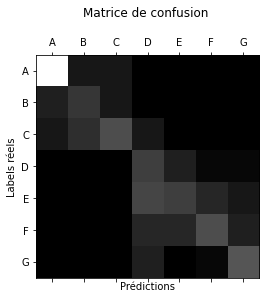

[[33  3  3  0  0  0  0]
 [ 4  7  3  0  0  0  0]
 [ 3  6 10  3  0  0  0]
 [ 0  0  0  8  4  1  1]
 [ 0  0  0  9  8  5  3]
 [ 0  0  0  5  5 10  4]
 [ 0  0  0  4  0  1 11]]


In [35]:
from Functions import Classification_Functions
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test_b, y_test_pred)
display_conf_matrix(conf_mx)
display_conf_matrix(conf_mx, color=False)

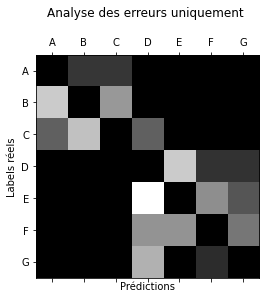

In [36]:
plot_error_analysis(conf_mx)

Erros are not the same as the errors of the best l1 logistic regression model without resampling.